In [4]:

pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.50
    Uninstalling yfinance-0.2.50:
      Successfully uninstalled yfinance-0.2.50
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf 

In [6]:
data = pd.read_csv("/kaggle/input/gold-price/goldstock v1.csv")
data.head()


,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [7]:
data.shape

(2511, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [9]:
data.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [10]:
print(data.isnull().sum())
# Handle missing values
data = data.dropna()
data.drop([data.columns[0]] , inplace=True , axis=1)
data.columns

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64


Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

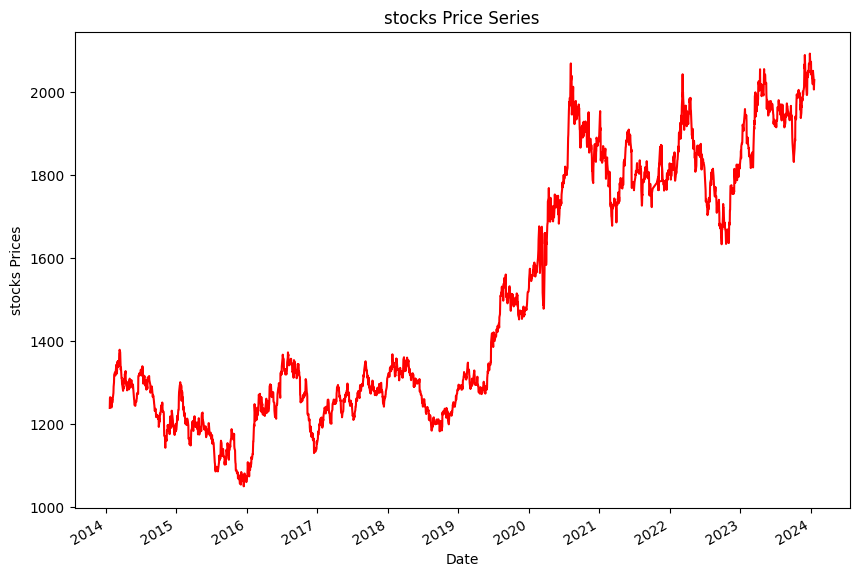

In [12]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel('{} Prices'.format("stocks"))
plt.title('{} Price Series'.format("stocks"))
plt.show()

<ipython-input-13-7576e4f36f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Close', ylabel='Density'>

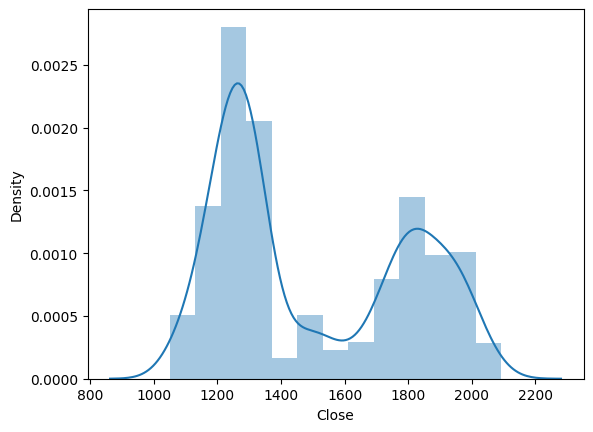

In [13]:
sns.distplot(data["Close"])

<ipython-input-14-daae21fed2ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Open', ylabel='Density'>

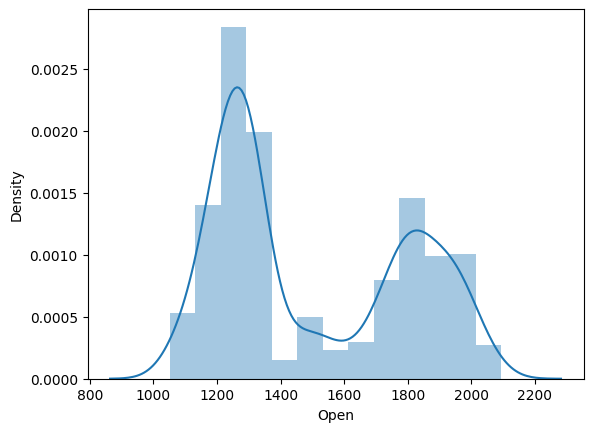

In [14]:
sns.distplot(data["Open"])

<ipython-input-15-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='High', ylabel='Density'>

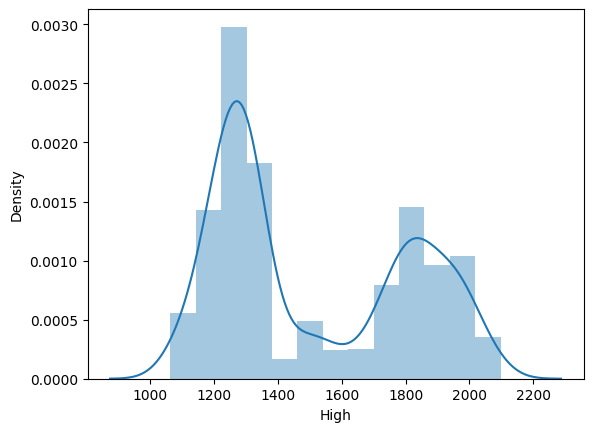

In [15]:
sns.distplot(data["High"])

non-linear data, not normally distributed

In [16]:
x = data.drop("Close",axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2008, 4)
(503, 4)
(2008,)
(503,)


In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)
predLR = lr.predict(X_test)


In [26]:
## The predictions are pretty acurate but the data is non linear and not normally distributed
# maybe it is overfitting, we can try using the mse or rmse to eval
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test,y_pred)
    rsm = np.sqrt(mse)
    r2_scors = r2_score(y_test,y_pred)

    print('MSE:-',mse)
    print("RMSE:",rsm)
    print("R2_score",r2_scors)

calculate_metrics(Y_test,predLR)

MSE:- 30.44951402489867
RMSE: 5.518107830126072
R2_score 0.9996405473340046


In [30]:
#Lasso and Ridge
from sklearn.linear_model import Lasso,Ridge

la = Lasso(). fit(X_train,Y_train)
Rd = Ridge(). fit(X_train,Y_train)

la_pred = la.predict(X_test)
Rd_pred = Rd.predict(X_test)

#eval for lasso
calculate_metrics(Y_test,la_pred)

MSE:- 72.9699352230815
RMSE: 8.54224415613845
R2_score 0.9991385991338975


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.476e+04, tolerance: 1.815e+04
  model = cd_fast.enet_coordinate_descent(


In [31]:
#Ridge
calculate_metrics(Y_test,Rd_pred)

MSE:- 30.44952172683213
RMSE: 5.51810852800415
R2_score 0.9996405472430843
